<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Uniform-Lévy-walks" data-toc-modified-id="Uniform-Lévy-walks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uniform Lévy walks</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import celluloid
import numpy as np
import sadie

## Overview

A Lévy walk is a process (in this case, in two-dimensional Euclidean space) in which the distribution of trip distances follows the Levy distribution

$$ f(x) = \frac{e^{-\frac{1}{2x}}}{\sqrt{2 \pi x^3}} $$

and trip azimuths are generally determined using a uniform distribution over $(0, 2\pi]$.

Sadie implements a range of Lévy walkers:

* [Uniform Lévy walker](https://sadie.readthedocs.io/en/latest/walkers.html#the-uniform-levy-walker): unbounded Lévy flight with a uniform angular distribution over $(0, 2\pi]$.
* [Bounded uniform Lévy walker](https://sadie.readthedocs.io/en/latest/walkers.html#the-bounded-uniform-levy-walker): takes a bounding distribution, a scaling factor and optional parameters of the bounding distribution, and determines retargeting based on the distribution.
* [Homesick Lévy walkers](https://sadie.readthedocs.io/en/latest/walkers.html#homesick-levy-walkers): implementing the homesick Lévy walk concept from [Fujihara and Miwa (2014)](https://arxiv.org/abs/1408.0427) in two ways – stepwise retargeting and tripwise retargeting.

## Uniform Lévy walks

In [2]:
%%time

m = sadie.models.simple.SimpleModel(max_time=1000)

m.add_agent(sadie.agents.walkers.UniformLevyRandomWalker(*np.random.randint(-100, 100, 2)))

%time
m.run()

df = m.to_df()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 90.3 ms, sys: 3.22 ms, total: 93.5 ms
Wall time: 236 ms


CPU times: user 7 s, sys: 839 ms, total: 7.84 s
Wall time: 17.7 s


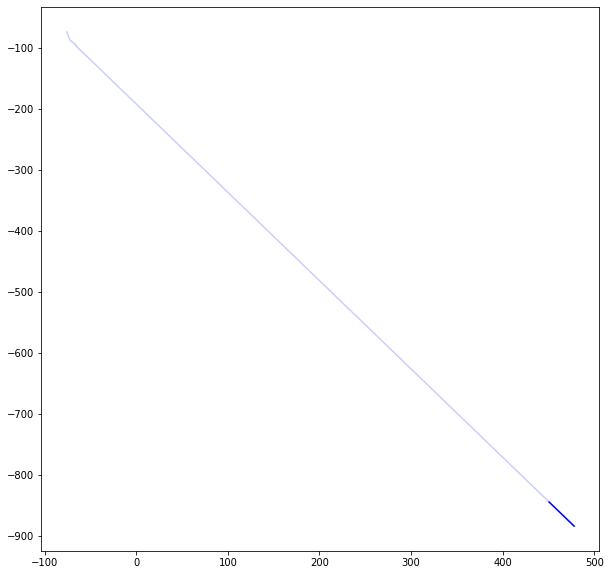

In [3]:
%%time

from celluloid import Camera
from IPython.display import HTML
from math import floor

fig = plt.figure(figsize=(10, 10))
cam = Camera(fig)

for i in range(df.time.min(), df.time.max()):
    if i % 10 == 0:
        subdf = df[df.time < i]
        plt.plot(subdf.x, subdf.y, "b-", alpha=0.2)
        plt.plot(subdf.x[-1 * floor(df.time.max() / 20):], subdf.y[-1 * floor(df.time.max() / 20):], "b-", alpha=1)
        cam.snap()

HTML(cam.animate().to_html5_video())